<h1 style="text-align: center;">Deep Learning<br><br>(ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [3]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [8]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [4]:
df["Geography"] = df.Geography.map({
    "France": 0,
    "Germany": 1,
    "Spain": 2
})

In [10]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [5]:
df["Gender"] = df.Gender.map({
    "Male": 0,
    "Female": 1
})

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Geography,10000.000,0.746,0.828,0.000,0.000,0.000,1.000,2.000
Gender,10000.000,0.454,0.498,0.000,0.000,0.000,1.000,1.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.000,1,1,1,101348.880,1
1,608,2,1,41,1,83807.860,1,0,1,112542.580,0
2,502,0,1,42,8,159660.800,3,1,0,113931.570,1
3,699,0,1,39,1,0.000,2,0,0,93826.630,0
4,850,2,1,43,2,125510.820,1,1,1,79084.100,0


In [14]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

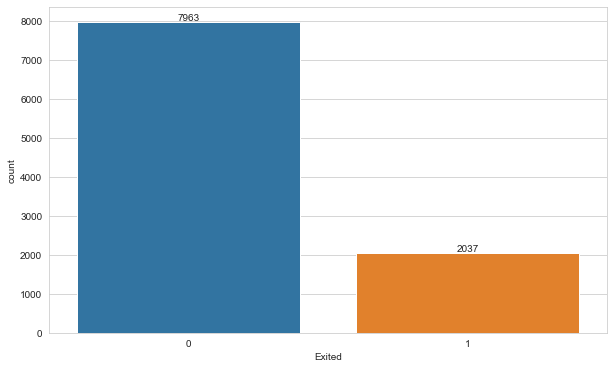

In [15]:
ax = sns.countplot(df.Exited)
ax.bar_label(ax.containers[0]);

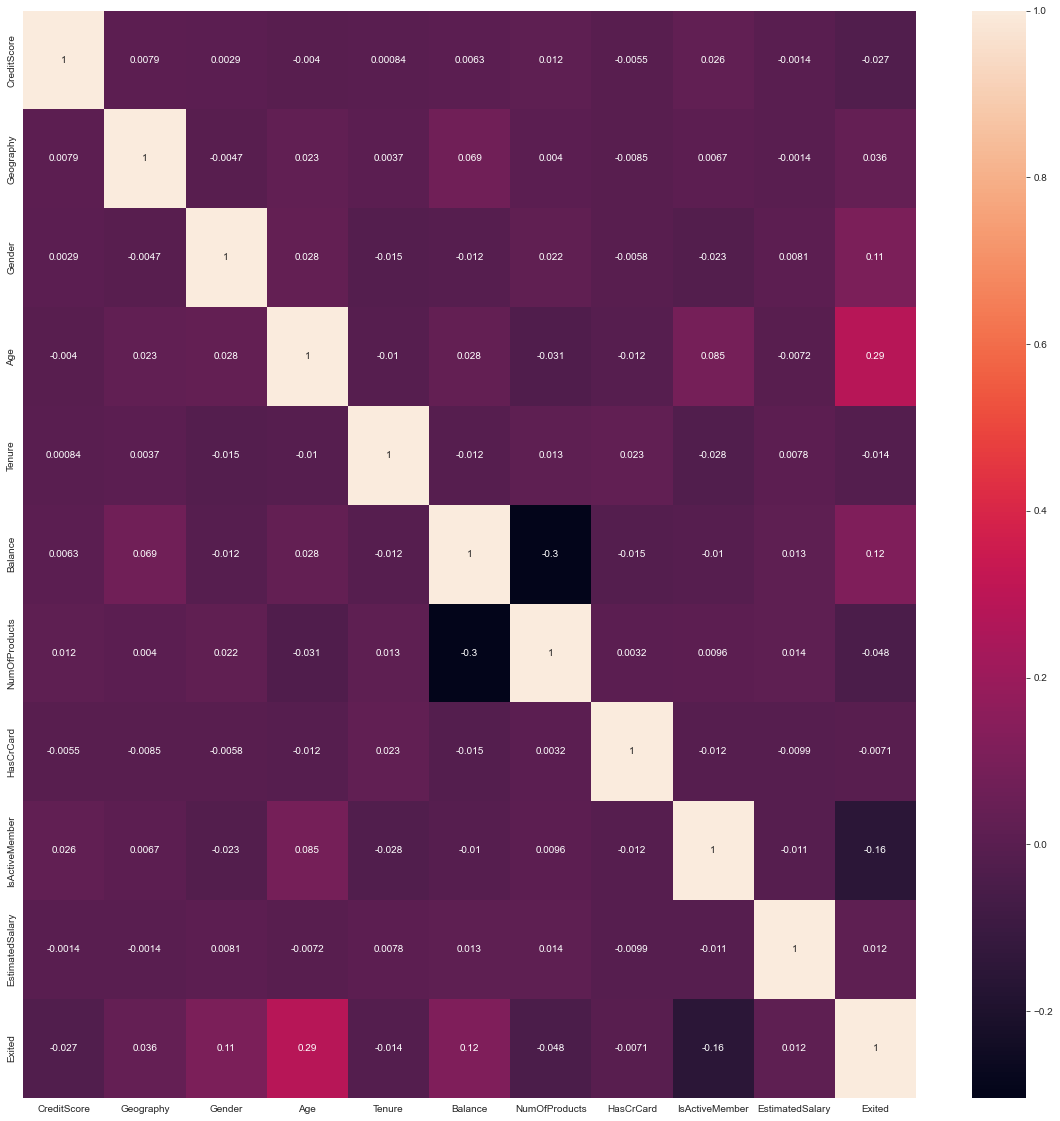

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

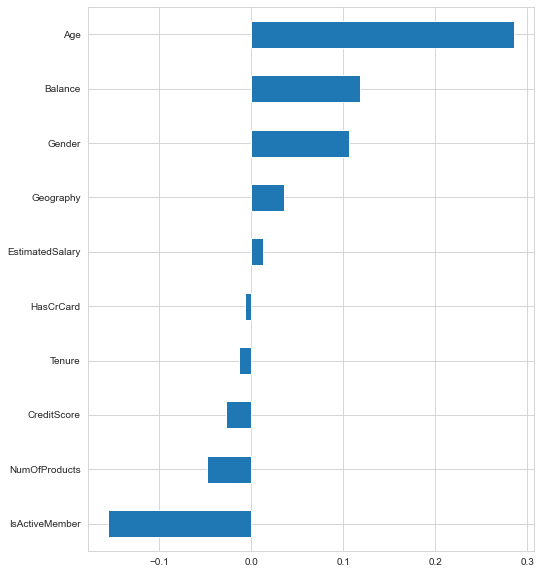

In [17]:
plt.figure(figsize = (8,10))
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

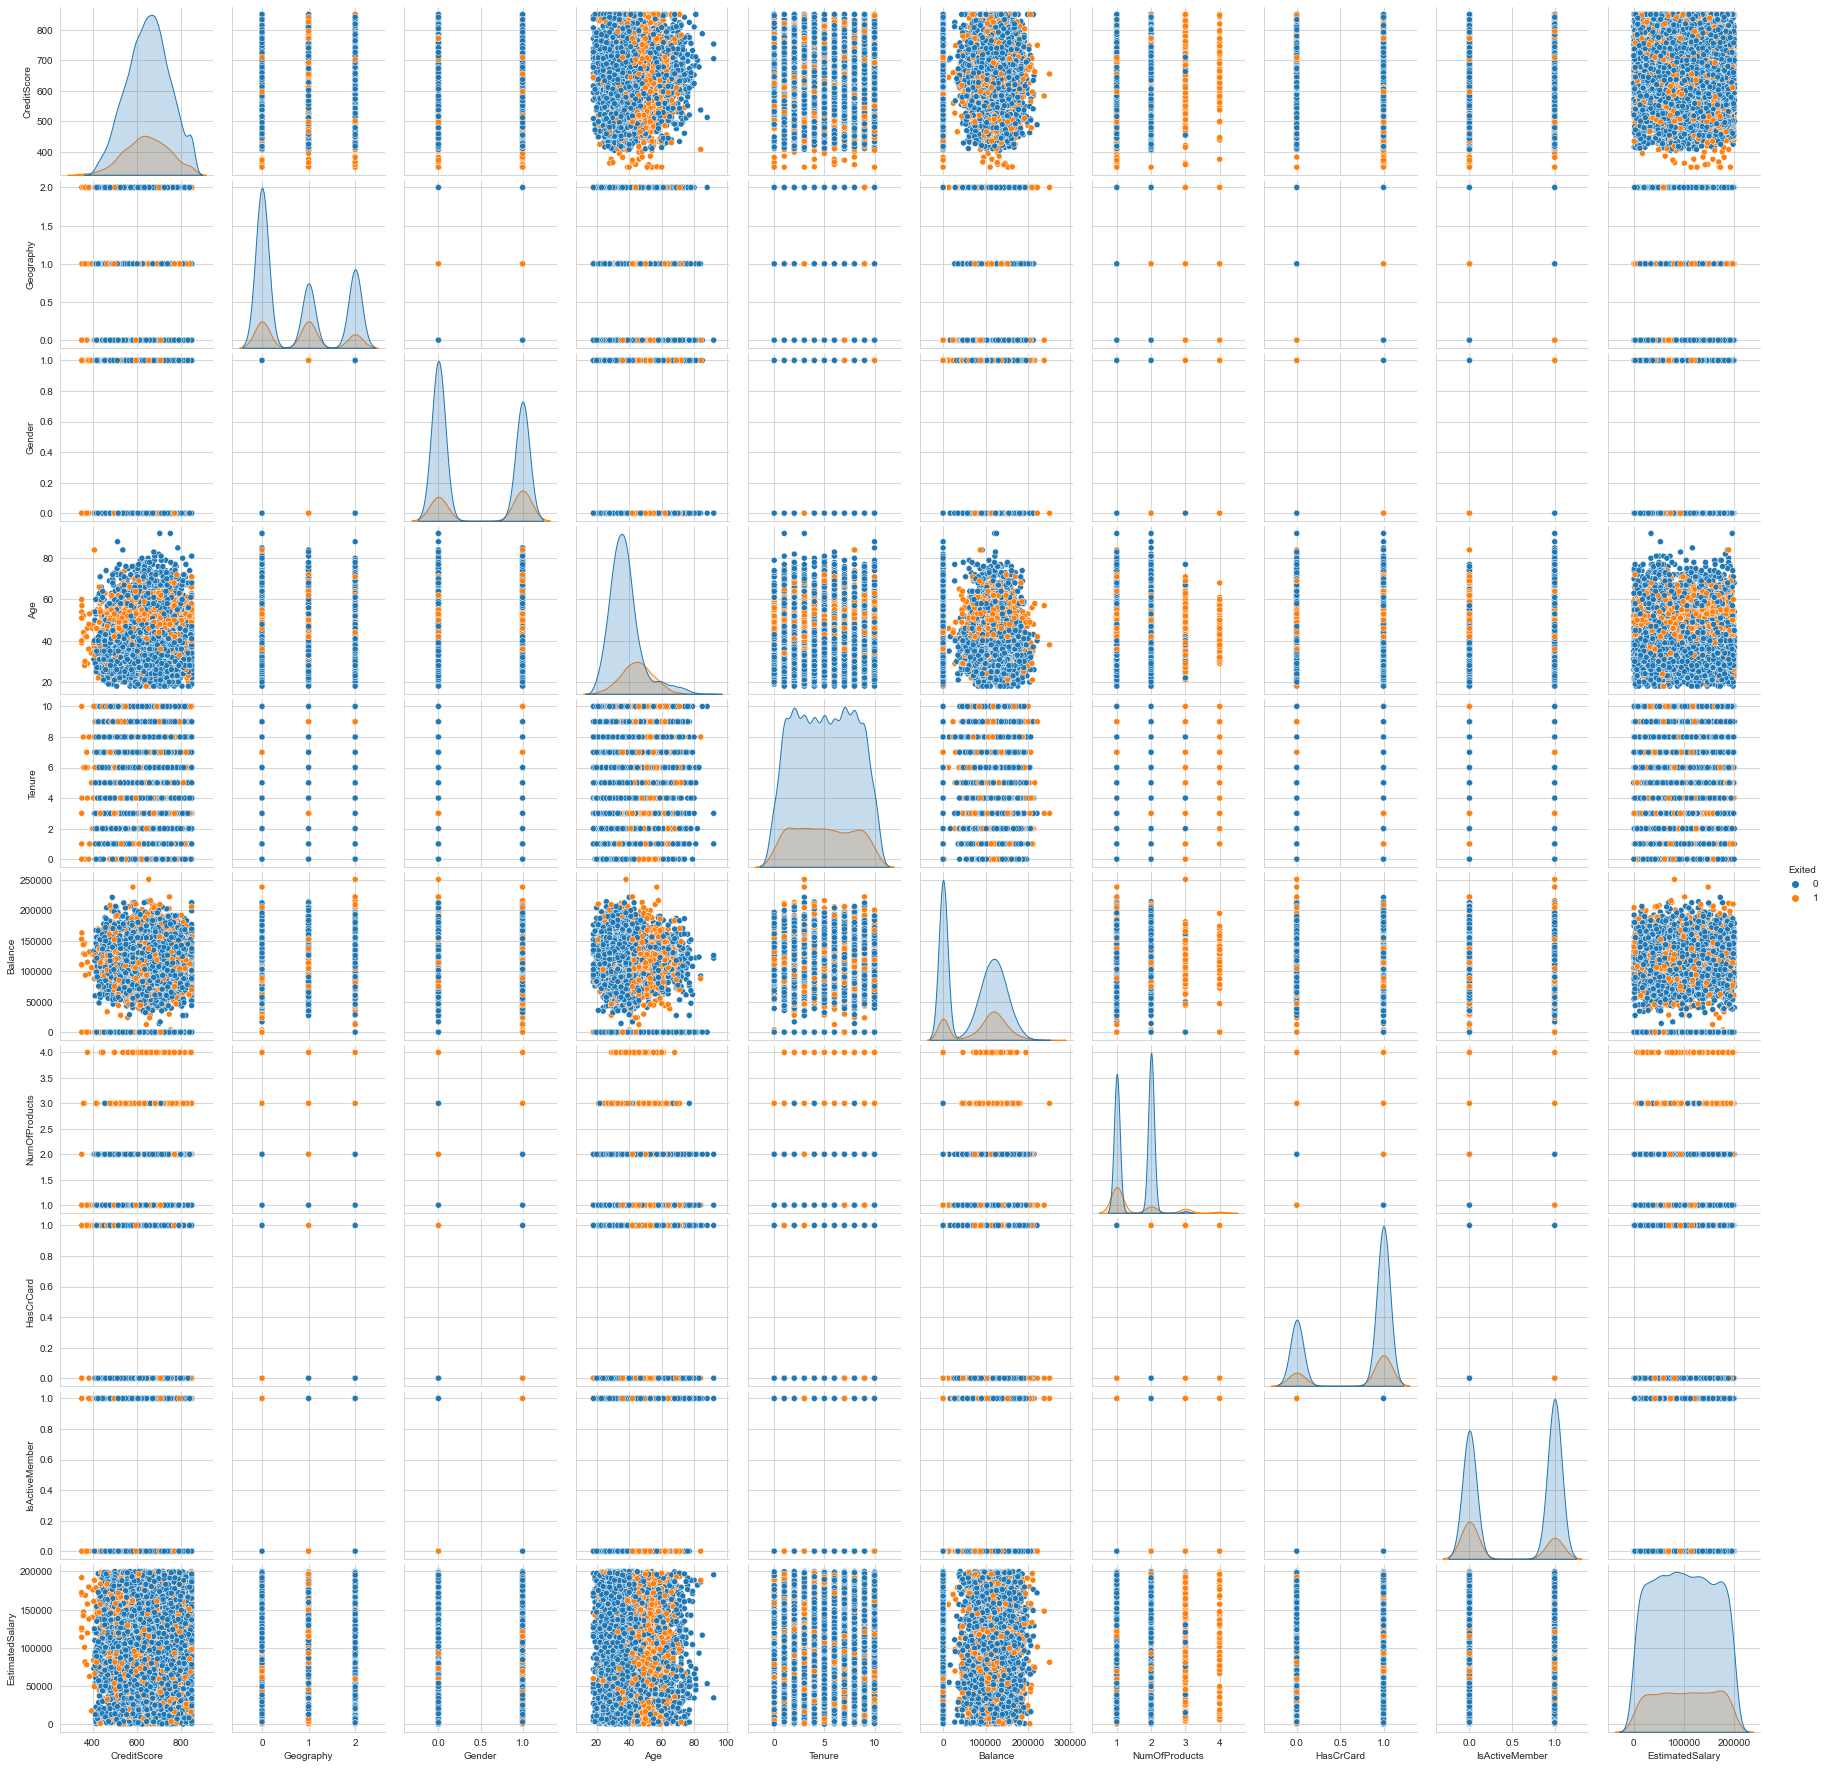

In [18]:
sns.pairplot(df, hue="Exited")

# Preprocessing of Data
- Train | Test Split, Scalling

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [7]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [8]:
seed = 101

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.15, random_state = seed)

In [10]:
scaler = MinMaxScaler()

In [11]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [26]:
X_train.shape

(8500, 10)

In [27]:
X_test.shape

(1500, 10)

In [28]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [29]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 32, epochs = 1000, verbose=1)

Epoch 1/1000
226/226 [==============================] - 3s 6ms/step - loss: 0.5821 - accuracy: 0.7763 - val_loss: 0.5100 - val_accuracy: 0.7890
Epoch 2/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4847 - accuracy: 0.7976 - val_loss: 0.4820 - val_accuracy: 0.7890
Epoch 3/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4588 - accuracy: 0.7976 - val_loss: 0.4638 - val_accuracy: 0.7890
Epoch 4/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4442 - accuracy: 0.7976 - val_loss: 0.4502 - val_accuracy: 0.7929
Epoch 5/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4338 - accuracy: 0.8050 - val_loss: 0.4425 - val_accuracy: 0.7945
Epoch 6/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4259 - accuracy: 0.8116 - val_loss: 0.4338 - val_accuracy: 0.8000
Epoch 7/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4157 - accuracy: 0.8179 - val_loss: 0.4234 - val_accuracy:

226/226 [==============================] - 1s 4ms/step - loss: 0.3231 - accuracy: 0.8682 - val_loss: 0.3475 - val_accuracy: 0.8502
Epoch 114/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3229 - accuracy: 0.8678 - val_loss: 0.3446 - val_accuracy: 0.8502
Epoch 115/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3242 - accuracy: 0.8652 - val_loss: 0.3457 - val_accuracy: 0.8533
Epoch 116/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3226 - accuracy: 0.8669 - val_loss: 0.3451 - val_accuracy: 0.8510
Epoch 117/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3224 - accuracy: 0.8678 - val_loss: 0.3491 - val_accuracy: 0.8525
Epoch 118/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3236 - accuracy: 0.8666 - val_loss: 0.3513 - val_accuracy: 0.8502
Epoch 119/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3239 - accuracy: 0.8692 - val_loss: 0.3470 - val_accuracy: 

226/226 [==============================] - 1s 3ms/step - loss: 0.3157 - accuracy: 0.8700 - val_loss: 0.3456 - val_accuracy: 0.8533
Epoch 226/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3158 - accuracy: 0.8700 - val_loss: 0.3461 - val_accuracy: 0.8502
Epoch 227/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3146 - accuracy: 0.8704 - val_loss: 0.3439 - val_accuracy: 0.8557
Epoch 228/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3154 - accuracy: 0.8717 - val_loss: 0.3443 - val_accuracy: 0.8549
Epoch 229/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3149 - accuracy: 0.8685 - val_loss: 0.3444 - val_accuracy: 0.8494
Epoch 230/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3154 - accuracy: 0.8704 - val_loss: 0.3467 - val_accuracy: 0.8541
Epoch 231/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3157 - accuracy: 0.8688 - val_loss: 0.3458 - val_accuracy: 

226/226 [==============================] - 1s 4ms/step - loss: 0.3105 - accuracy: 0.8710 - val_loss: 0.3556 - val_accuracy: 0.8565
Epoch 338/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3128 - accuracy: 0.8717 - val_loss: 0.3496 - val_accuracy: 0.8518
Epoch 339/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3125 - accuracy: 0.8709 - val_loss: 0.3529 - val_accuracy: 0.8525
Epoch 340/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3114 - accuracy: 0.8729 - val_loss: 0.3499 - val_accuracy: 0.8541
Epoch 341/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3111 - accuracy: 0.8711 - val_loss: 0.3518 - val_accuracy: 0.8565
Epoch 342/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3108 - accuracy: 0.8716 - val_loss: 0.3577 - val_accuracy: 0.8502
Epoch 343/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3141 - accuracy: 0.8709 - val_loss: 0.3499 - val_accuracy: 

226/226 [==============================] - 1s 3ms/step - loss: 0.3115 - accuracy: 0.8696 - val_loss: 0.3605 - val_accuracy: 0.8439
Epoch 450/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3083 - accuracy: 0.8739 - val_loss: 0.3551 - val_accuracy: 0.8525
Epoch 451/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3083 - accuracy: 0.8736 - val_loss: 0.3517 - val_accuracy: 0.8510
Epoch 452/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3097 - accuracy: 0.8724 - val_loss: 0.3538 - val_accuracy: 0.8518
Epoch 453/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3096 - accuracy: 0.8698 - val_loss: 0.3526 - val_accuracy: 0.8494
Epoch 454/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3086 - accuracy: 0.8721 - val_loss: 0.3604 - val_accuracy: 0.8486
Epoch 455/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3095 - accuracy: 0.8724 - val_loss: 0.3538 - val_accuracy: 

226/226 [==============================] - 1s 3ms/step - loss: 0.3080 - accuracy: 0.8713 - val_loss: 0.3621 - val_accuracy: 0.8471
Epoch 562/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3090 - accuracy: 0.8709 - val_loss: 0.3555 - val_accuracy: 0.8525
Epoch 563/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3071 - accuracy: 0.8732 - val_loss: 0.3559 - val_accuracy: 0.8494
Epoch 564/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3076 - accuracy: 0.8732 - val_loss: 0.3553 - val_accuracy: 0.8486
Epoch 565/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3086 - accuracy: 0.8739 - val_loss: 0.3534 - val_accuracy: 0.8494
Epoch 566/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3091 - accuracy: 0.8749 - val_loss: 0.3568 - val_accuracy: 0.8471
Epoch 567/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3071 - accuracy: 0.8734 - val_loss: 0.3547 - val_accuracy: 

226/226 [==============================] - 1s 3ms/step - loss: 0.3050 - accuracy: 0.8763 - val_loss: 0.3553 - val_accuracy: 0.8549
Epoch 674/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3050 - accuracy: 0.8757 - val_loss: 0.3564 - val_accuracy: 0.8525
Epoch 675/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3056 - accuracy: 0.8729 - val_loss: 0.3604 - val_accuracy: 0.8471
Epoch 676/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3074 - accuracy: 0.8713 - val_loss: 0.3596 - val_accuracy: 0.8455
Epoch 677/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3075 - accuracy: 0.8727 - val_loss: 0.3544 - val_accuracy: 0.8471
Epoch 678/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3071 - accuracy: 0.8754 - val_loss: 0.3561 - val_accuracy: 0.8533
Epoch 679/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3067 - accuracy: 0.8743 - val_loss: 0.3594 - val_accuracy: 

226/226 [==============================] - 1s 4ms/step - loss: 0.3047 - accuracy: 0.8745 - val_loss: 0.3573 - val_accuracy: 0.8518
Epoch 786/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3037 - accuracy: 0.8758 - val_loss: 0.3555 - val_accuracy: 0.8486
Epoch 787/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3048 - accuracy: 0.8747 - val_loss: 0.3560 - val_accuracy: 0.8471
Epoch 788/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3044 - accuracy: 0.8756 - val_loss: 0.3579 - val_accuracy: 0.8525
Epoch 789/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3046 - accuracy: 0.8739 - val_loss: 0.3555 - val_accuracy: 0.8502
Epoch 790/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3040 - accuracy: 0.8743 - val_loss: 0.3567 - val_accuracy: 0.8510
Epoch 791/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3038 - accuracy: 0.8743 - val_loss: 0.3566 - val_accuracy: 

226/226 [==============================] - 1s 3ms/step - loss: 0.3032 - accuracy: 0.8750 - val_loss: 0.3580 - val_accuracy: 0.8510
Epoch 898/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3028 - accuracy: 0.8727 - val_loss: 0.3615 - val_accuracy: 0.8431
Epoch 899/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3036 - accuracy: 0.8724 - val_loss: 0.3560 - val_accuracy: 0.8478
Epoch 900/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3030 - accuracy: 0.8739 - val_loss: 0.3577 - val_accuracy: 0.8455
Epoch 901/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3035 - accuracy: 0.8752 - val_loss: 0.3570 - val_accuracy: 0.8525
Epoch 902/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3030 - accuracy: 0.8746 - val_loss: 0.3573 - val_accuracy: 0.8486
Epoch 903/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.3024 - accuracy: 0.8753 - val_loss: 0.3567 - val_accuracy: 

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(10, 16) dtype=float32, numpy=
 array([[-4.83703017e-02, -6.99417293e-01,  6.51194155e-02,
         -2.75982410e-01,  5.02926171e-01, -4.63369973e-02,
          5.09627759e-01,  7.38323450e-01,  1.44374087e-01,
         -9.14509952e-01, -1.90616935e-01,  6.99596584e-01,
         -4.03275510e-04,  2.20396873e-02,  3.28620672e-01,
         -2.03880325e-01],
        [-2.32518584e-01,  1.40767276e-01,  5.34287810e-01,
          7.85411000e-02, -6.75867200e-01,  7.07844272e-02,
          1.62771237e+00,  5.30628443e-01,  7.31935740e-01,
         -8.22251976e-01, -1.63348168e-01, -1.10392138e-01,
         -2.94688102e-02, -3.25215384e-02,  3.80665332e-01,
          7.11703382e-04],
        [ 1.04605881e-02,  5.56279309e-02,  1.14707619e-01,
          1.98540151e-01, -7.78996497e-02, -2.14324221e-01,
         -1.74442753e-01, -1.18738794e+00, -4.28332001e-01,
          1.05734444e+00, -5.86275160e-02,  1.66169599e-01,
          4.89278227e-01, -1.52495116e

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [32]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.582,0.776,0.510,0.789
1,0.485,0.798,0.482,0.789
2,0.459,0.798,0.464,0.789
3,0.444,0.798,0.450,0.793
4,0.434,0.805,0.442,0.795


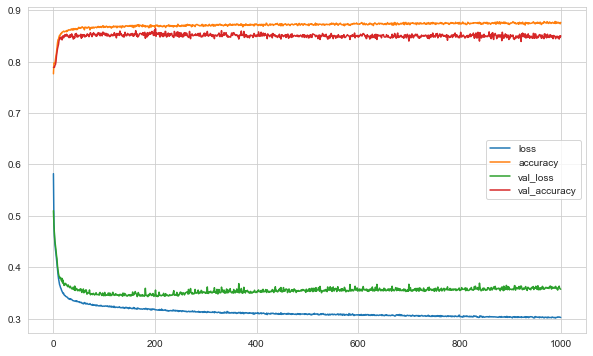

In [33]:
loss_df.plot();

In [34]:
model.evaluate(X_test, y_test, verbose=0)

[0.4002067446708679, 0.8446666598320007]

In [35]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.4002067446708679
accuracy :  0.8446666598320007


In [36]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 2ms/step
[[1138   56]
 [ 177  129]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1194
           1       0.70      0.42      0.53       306

    accuracy                           0.84      1500
   macro avg       0.78      0.69      0.72      1500
weighted avg       0.83      0.84      0.83      1500



47/47 [==============================] - 0s 2ms/step


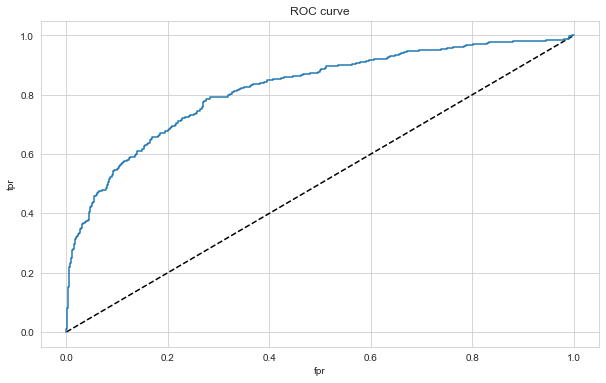

In [37]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [13]:
neg, pos = np.bincount(df['Exited'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 10000
    Positive: 2037 (20.37% of total)



In [14]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.63
Weight for class 1: 2.45


### Create The Model

In [40]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [41]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 32, epochs = 1000, verbose=1, 
          class_weight=class_weight)

Epoch 1/1000
226/226 [==============================] - 2s 5ms/step - loss: 0.6790 - accuracy: 0.5578 - val_loss: 0.6445 - val_accuracy: 0.6471
Epoch 2/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.6451 - accuracy: 0.6145 - val_loss: 0.6129 - val_accuracy: 0.6478
Epoch 3/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.6138 - accuracy: 0.6545 - val_loss: 0.6608 - val_accuracy: 0.5976
Epoch 4/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.5922 - accuracy: 0.6720 - val_loss: 0.5481 - val_accuracy: 0.7137
Epoch 5/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.5743 - accuracy: 0.7059 - val_loss: 0.5895 - val_accuracy: 0.6784
Epoch 6/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.5561 - accuracy: 0.7179 - val_loss: 0.5672 - val_accuracy: 0.6980
Epoch 7/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.5357 - accuracy: 0.7351 - val_loss: 0.5463 - val_accuracy:

226/226 [==============================] - 1s 3ms/step - loss: 0.4402 - accuracy: 0.7940 - val_loss: 0.4795 - val_accuracy: 0.7718
Epoch 114/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.4401 - accuracy: 0.7896 - val_loss: 0.4406 - val_accuracy: 0.7953
Epoch 115/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.4412 - accuracy: 0.7947 - val_loss: 0.4604 - val_accuracy: 0.7796
Epoch 116/1000
226/226 [==============================] - 1s 3ms/step - loss: 0.4386 - accuracy: 0.7925 - val_loss: 0.4684 - val_accuracy: 0.7710
Epoch 117/1000
226/226 [==============================] - 1s 2ms/step - loss: 0.4390 - accuracy: 0.7946 - val_loss: 0.4841 - val_accuracy: 0.7647
Epoch 118/1000
226/226 [==============================] - 1s 2ms/step - loss: 0.4412 - accuracy: 0.7911 - val_loss: 0.4833 - val_accuracy: 0.7616
Epoch 119/1000
226/226 [==============================] - 1s 2ms/step - loss: 0.4412 - accuracy: 0.7896 - val_loss: 0.4597 - val_accuracy: 

226/226 [==============================] - 1s 4ms/step - loss: 0.4257 - accuracy: 0.8068 - val_loss: 0.4179 - val_accuracy: 0.8125
Epoch 226/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4262 - accuracy: 0.8055 - val_loss: 0.4768 - val_accuracy: 0.7718
Epoch 227/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4246 - accuracy: 0.8078 - val_loss: 0.4521 - val_accuracy: 0.7922
Epoch 228/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4253 - accuracy: 0.8032 - val_loss: 0.4336 - val_accuracy: 0.8000
Epoch 229/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4244 - accuracy: 0.8057 - val_loss: 0.4579 - val_accuracy: 0.7898
Epoch 230/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4251 - accuracy: 0.8068 - val_loss: 0.4664 - val_accuracy: 0.7757
Epoch 231/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4262 - accuracy: 0.8042 - val_loss: 0.4569 - val_accuracy: 

226/226 [==============================] - 1s 5ms/step - loss: 0.4138 - accuracy: 0.8130 - val_loss: 0.4039 - val_accuracy: 0.8220
Epoch 338/1000
226/226 [==============================] - 1s 5ms/step - loss: 0.4151 - accuracy: 0.8115 - val_loss: 0.4403 - val_accuracy: 0.7945
Epoch 339/1000
226/226 [==============================] - 1s 5ms/step - loss: 0.4152 - accuracy: 0.8155 - val_loss: 0.4821 - val_accuracy: 0.7757
Epoch 340/1000
226/226 [==============================] - 1s 5ms/step - loss: 0.4142 - accuracy: 0.8131 - val_loss: 0.4343 - val_accuracy: 0.8008
Epoch 341/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4129 - accuracy: 0.8137 - val_loss: 0.4363 - val_accuracy: 0.7961
Epoch 342/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4136 - accuracy: 0.8152 - val_loss: 0.4861 - val_accuracy: 0.7749
Epoch 343/1000
226/226 [==============================] - 1s 5ms/step - loss: 0.4163 - accuracy: 0.8104 - val_loss: 0.4484 - val_accuracy: 

226/226 [==============================] - 1s 4ms/step - loss: 0.4072 - accuracy: 0.8129 - val_loss: 0.4965 - val_accuracy: 0.7686
Epoch 450/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4047 - accuracy: 0.8140 - val_loss: 0.4528 - val_accuracy: 0.7835
Epoch 451/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4041 - accuracy: 0.8166 - val_loss: 0.4644 - val_accuracy: 0.7773
Epoch 452/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4060 - accuracy: 0.8190 - val_loss: 0.4765 - val_accuracy: 0.7694
Epoch 453/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4058 - accuracy: 0.8136 - val_loss: 0.4236 - val_accuracy: 0.8039
Epoch 454/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4047 - accuracy: 0.8161 - val_loss: 0.4870 - val_accuracy: 0.7678
Epoch 455/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4055 - accuracy: 0.8112 - val_loss: 0.4587 - val_accuracy: 

226/226 [==============================] - 1s 4ms/step - loss: 0.4004 - accuracy: 0.8159 - val_loss: 0.5021 - val_accuracy: 0.7639
Epoch 562/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4027 - accuracy: 0.8149 - val_loss: 0.4439 - val_accuracy: 0.7835
Epoch 563/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4012 - accuracy: 0.8156 - val_loss: 0.4719 - val_accuracy: 0.7788
Epoch 564/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3997 - accuracy: 0.8184 - val_loss: 0.4908 - val_accuracy: 0.7765
Epoch 565/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4016 - accuracy: 0.8129 - val_loss: 0.4582 - val_accuracy: 0.7914
Epoch 566/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4032 - accuracy: 0.8125 - val_loss: 0.4875 - val_accuracy: 0.7663
Epoch 567/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4001 - accuracy: 0.8195 - val_loss: 0.5003 - val_accuracy: 

226/226 [==============================] - 1s 4ms/step - loss: 0.3952 - accuracy: 0.8176 - val_loss: 0.4581 - val_accuracy: 0.7835
Epoch 674/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3970 - accuracy: 0.8122 - val_loss: 0.4551 - val_accuracy: 0.7835
Epoch 675/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3978 - accuracy: 0.8174 - val_loss: 0.4423 - val_accuracy: 0.7922
Epoch 676/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3976 - accuracy: 0.8151 - val_loss: 0.4865 - val_accuracy: 0.7757
Epoch 677/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3986 - accuracy: 0.8141 - val_loss: 0.4528 - val_accuracy: 0.7914
Epoch 678/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3982 - accuracy: 0.8183 - val_loss: 0.4466 - val_accuracy: 0.7875
Epoch 679/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3980 - accuracy: 0.8152 - val_loss: 0.4037 - val_accuracy: 

226/226 [==============================] - 1s 4ms/step - loss: 0.3957 - accuracy: 0.8190 - val_loss: 0.4522 - val_accuracy: 0.7827
Epoch 786/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3940 - accuracy: 0.8163 - val_loss: 0.4395 - val_accuracy: 0.7961
Epoch 787/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3932 - accuracy: 0.8199 - val_loss: 0.4562 - val_accuracy: 0.7843
Epoch 788/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3937 - accuracy: 0.8176 - val_loss: 0.4228 - val_accuracy: 0.8071
Epoch 789/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3933 - accuracy: 0.8188 - val_loss: 0.4739 - val_accuracy: 0.7757
Epoch 790/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3923 - accuracy: 0.8181 - val_loss: 0.4570 - val_accuracy: 0.7835
Epoch 791/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3939 - accuracy: 0.8198 - val_loss: 0.4344 - val_accuracy: 

226/226 [==============================] - 1s 4ms/step - loss: 0.3914 - accuracy: 0.8226 - val_loss: 0.4647 - val_accuracy: 0.7851
Epoch 898/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3943 - accuracy: 0.8166 - val_loss: 0.4973 - val_accuracy: 0.7686
Epoch 899/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3932 - accuracy: 0.8156 - val_loss: 0.4979 - val_accuracy: 0.7576
Epoch 900/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3920 - accuracy: 0.8158 - val_loss: 0.4810 - val_accuracy: 0.7741
Epoch 901/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3914 - accuracy: 0.8155 - val_loss: 0.4443 - val_accuracy: 0.7969
Epoch 902/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3912 - accuracy: 0.8155 - val_loss: 0.4398 - val_accuracy: 0.7929
Epoch 903/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3910 - accuracy: 0.8185 - val_loss: 0.4684 - val_accuracy: 

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [42]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.679,0.558,0.644,0.647
1,0.645,0.615,0.613,0.648
2,0.614,0.655,0.661,0.598
3,0.592,0.672,0.548,0.714
4,0.574,0.706,0.589,0.678


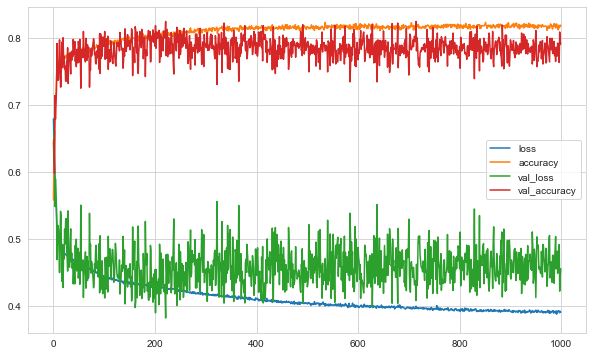

In [43]:
loss_df.plot();

In [44]:
model.evaluate(X_test, y_test, verbose=0)

[0.5054717063903809, 0.7900000214576721]

In [45]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.5054717063903809
accuracy :  0.7900000214576721


In [46]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 2ms/step
[[972 222]
 [ 93 213]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1194
           1       0.49      0.70      0.57       306

    accuracy                           0.79      1500
   macro avg       0.70      0.76      0.72      1500
weighted avg       0.83      0.79      0.80      1500



47/47 [==============================] - 0s 3ms/step


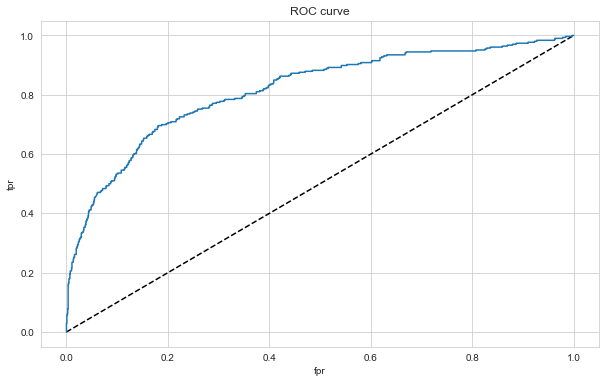

In [47]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [15]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [49]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [50]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 32, epochs = 1000, verbose=1, 
          class_weight=class_weight)

Epoch 1/1000
226/226 [==============================] - 3s 6ms/step - loss: 0.6869 - accuracy: 0.6634 - val_loss: 0.6273 - val_accuracy: 0.6753
Epoch 2/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.6703 - accuracy: 0.6462 - val_loss: 0.6010 - val_accuracy: 0.6745
Epoch 3/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.6586 - accuracy: 0.6579 - val_loss: 0.6376 - val_accuracy: 0.5914
Epoch 4/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.6481 - accuracy: 0.6619 - val_loss: 0.5707 - val_accuracy: 0.6941
Epoch 5/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.6345 - accuracy: 0.6927 - val_loss: 0.5807 - val_accuracy: 0.6659
Epoch 6/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.6190 - accuracy: 0.6979 - val_loss: 0.5822 - val_accuracy: 0.6722
Epoch 7/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.6024 - accuracy: 0.7185 - val_loss: 0.5864 - val_accuracy:

226/226 [==============================] - 1s 4ms/step - loss: 0.4352 - accuracy: 0.8018 - val_loss: 0.5039 - val_accuracy: 0.7576
Epoch 114/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4354 - accuracy: 0.7983 - val_loss: 0.4725 - val_accuracy: 0.7796
Epoch 115/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4374 - accuracy: 0.8025 - val_loss: 0.4753 - val_accuracy: 0.7788
Epoch 116/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4338 - accuracy: 0.8021 - val_loss: 0.4751 - val_accuracy: 0.7796
Epoch 117/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4339 - accuracy: 0.8042 - val_loss: 0.5062 - val_accuracy: 0.7631
Epoch 118/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4359 - accuracy: 0.7972 - val_loss: 0.5101 - val_accuracy: 0.7616
Epoch 119/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4357 - accuracy: 0.7997 - val_loss: 0.4906 - val_accuracy: 

226/226 [==============================] - 1s 4ms/step - loss: 0.4191 - accuracy: 0.8086 - val_loss: 0.4293 - val_accuracy: 0.8086
Epoch 226/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4193 - accuracy: 0.8082 - val_loss: 0.4795 - val_accuracy: 0.7812
Epoch 227/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4190 - accuracy: 0.8094 - val_loss: 0.4642 - val_accuracy: 0.7937
Epoch 228/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4184 - accuracy: 0.8061 - val_loss: 0.4377 - val_accuracy: 0.7984
Epoch 229/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4179 - accuracy: 0.8062 - val_loss: 0.4741 - val_accuracy: 0.7890
Epoch 230/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4178 - accuracy: 0.8120 - val_loss: 0.4904 - val_accuracy: 0.7827
Epoch 231/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4203 - accuracy: 0.8061 - val_loss: 0.4771 - val_accuracy: 

226/226 [==============================] - 1s 4ms/step - loss: 0.4083 - accuracy: 0.8068 - val_loss: 0.4092 - val_accuracy: 0.8180
Epoch 338/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4099 - accuracy: 0.8090 - val_loss: 0.4662 - val_accuracy: 0.7937
Epoch 339/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4094 - accuracy: 0.8086 - val_loss: 0.5097 - val_accuracy: 0.7757
Epoch 340/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4085 - accuracy: 0.8098 - val_loss: 0.4615 - val_accuracy: 0.7961
Epoch 341/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4078 - accuracy: 0.8091 - val_loss: 0.4064 - val_accuracy: 0.8235
Epoch 342/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4092 - accuracy: 0.8107 - val_loss: 0.4889 - val_accuracy: 0.7820
Epoch 343/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4089 - accuracy: 0.8087 - val_loss: 0.4445 - val_accuracy: 

226/226 [==============================] - 1s 4ms/step - loss: 0.4081 - accuracy: 0.8141 - val_loss: 0.5278 - val_accuracy: 0.7506
Epoch 450/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4019 - accuracy: 0.8134 - val_loss: 0.4750 - val_accuracy: 0.7812
Epoch 451/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4013 - accuracy: 0.8162 - val_loss: 0.4568 - val_accuracy: 0.7937
Epoch 452/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4031 - accuracy: 0.8133 - val_loss: 0.4974 - val_accuracy: 0.7663
Epoch 453/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4026 - accuracy: 0.8098 - val_loss: 0.4250 - val_accuracy: 0.8110
Epoch 454/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4031 - accuracy: 0.8119 - val_loss: 0.4532 - val_accuracy: 0.8000
Epoch 455/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4021 - accuracy: 0.8120 - val_loss: 0.5006 - val_accuracy: 

226/226 [==============================] - 1s 4ms/step - loss: 0.3978 - accuracy: 0.8123 - val_loss: 0.5127 - val_accuracy: 0.7616
Epoch 562/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3983 - accuracy: 0.8149 - val_loss: 0.4822 - val_accuracy: 0.7827
Epoch 563/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3982 - accuracy: 0.8159 - val_loss: 0.5017 - val_accuracy: 0.7671
Epoch 564/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3964 - accuracy: 0.8138 - val_loss: 0.5187 - val_accuracy: 0.7584
Epoch 565/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3991 - accuracy: 0.8129 - val_loss: 0.4580 - val_accuracy: 0.7882
Epoch 566/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3984 - accuracy: 0.8165 - val_loss: 0.4876 - val_accuracy: 0.7765
Epoch 567/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3967 - accuracy: 0.8166 - val_loss: 0.5281 - val_accuracy: 

226/226 [==============================] - 1s 5ms/step - loss: 0.3929 - accuracy: 0.8203 - val_loss: 0.4388 - val_accuracy: 0.8024
Epoch 674/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3933 - accuracy: 0.8165 - val_loss: 0.4714 - val_accuracy: 0.7922
Epoch 675/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3938 - accuracy: 0.8172 - val_loss: 0.4474 - val_accuracy: 0.8008
Epoch 676/1000
226/226 [==============================] - 1s 5ms/step - loss: 0.3954 - accuracy: 0.8149 - val_loss: 0.4656 - val_accuracy: 0.7890
Epoch 677/1000
226/226 [==============================] - 1s 5ms/step - loss: 0.3926 - accuracy: 0.8163 - val_loss: 0.4786 - val_accuracy: 0.7859
Epoch 678/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3959 - accuracy: 0.8155 - val_loss: 0.4684 - val_accuracy: 0.7875
Epoch 679/1000
226/226 [==============================] - 1s 5ms/step - loss: 0.3960 - accuracy: 0.8159 - val_loss: 0.4299 - val_accuracy: 

226/226 [==============================] - 1s 4ms/step - loss: 0.3932 - accuracy: 0.8143 - val_loss: 0.4917 - val_accuracy: 0.7796
Epoch 786/1000
226/226 [==============================] - 1s 5ms/step - loss: 0.3899 - accuracy: 0.8201 - val_loss: 0.4469 - val_accuracy: 0.7969
Epoch 787/1000
226/226 [==============================] - 1s 5ms/step - loss: 0.3921 - accuracy: 0.8173 - val_loss: 0.4868 - val_accuracy: 0.7780
Epoch 788/1000
226/226 [==============================] - 1s 5ms/step - loss: 0.3934 - accuracy: 0.8129 - val_loss: 0.4322 - val_accuracy: 0.8204
Epoch 789/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3893 - accuracy: 0.8159 - val_loss: 0.4724 - val_accuracy: 0.7804
Epoch 790/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3902 - accuracy: 0.8173 - val_loss: 0.4579 - val_accuracy: 0.7976
Epoch 791/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3907 - accuracy: 0.8166 - val_loss: 0.4421 - val_accuracy: 

226/226 [==============================] - 1s 4ms/step - loss: 0.3900 - accuracy: 0.8156 - val_loss: 0.4459 - val_accuracy: 0.8031
Epoch 898/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3894 - accuracy: 0.8199 - val_loss: 0.4896 - val_accuracy: 0.7765
Epoch 899/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3910 - accuracy: 0.8180 - val_loss: 0.4900 - val_accuracy: 0.7694
Epoch 900/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3924 - accuracy: 0.8147 - val_loss: 0.5076 - val_accuracy: 0.7671
Epoch 901/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3907 - accuracy: 0.8147 - val_loss: 0.4593 - val_accuracy: 0.7922
Epoch 902/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3874 - accuracy: 0.8190 - val_loss: 0.4764 - val_accuracy: 0.7788
Epoch 903/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.3874 - accuracy: 0.8162 - val_loss: 0.4682 - val_accuracy: 

In [51]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.5069134831428528
accuracy :  0.7746666669845581


In [52]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 3ms/step
[[960 234]
 [104 202]]
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1194
           1       0.46      0.66      0.54       306

    accuracy                           0.77      1500
   macro avg       0.68      0.73      0.70      1500
weighted avg       0.81      0.77      0.79      1500



### Add Dropout Layer

In [20]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [54]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(4, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [55]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 32, epochs = 1000, verbose = 1, 
          class_weight=class_weight)

Epoch 1/1000
226/226 [==============================] - 3s 6ms/step - loss: 0.6877 - accuracy: 0.5431 - val_loss: 0.6969 - val_accuracy: 0.6055
Epoch 2/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.6807 - accuracy: 0.6400 - val_loss: 0.6776 - val_accuracy: 0.6361
Epoch 3/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.6673 - accuracy: 0.6713 - val_loss: 0.6700 - val_accuracy: 0.6078
Epoch 4/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.6615 - accuracy: 0.6671 - val_loss: 0.6173 - val_accuracy: 0.6957
Epoch 5/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.6542 - accuracy: 0.6930 - val_loss: 0.6218 - val_accuracy: 0.6698
Epoch 6/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.6425 - accuracy: 0.6857 - val_loss: 0.6173 - val_accuracy: 0.6729
Epoch 7/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.6354 - accuracy: 0.6687 - val_loss: 0.6410 - val_accuracy:

226/226 [==============================] - 1s 4ms/step - loss: 0.5041 - accuracy: 0.7593 - val_loss: 0.4689 - val_accuracy: 0.7765
Epoch 114/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4998 - accuracy: 0.7493 - val_loss: 0.4689 - val_accuracy: 0.7765
Epoch 115/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.5115 - accuracy: 0.7507 - val_loss: 0.4767 - val_accuracy: 0.7843
Epoch 116/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.5052 - accuracy: 0.7525 - val_loss: 0.4996 - val_accuracy: 0.7467
Epoch 117/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4962 - accuracy: 0.7525 - val_loss: 0.4867 - val_accuracy: 0.7639
Epoch 118/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.5120 - accuracy: 0.7466 - val_loss: 0.4949 - val_accuracy: 0.7616
Epoch 119/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.5064 - accuracy: 0.7517 - val_loss: 0.5000 - val_accuracy: 

226/226 [==============================] - 1s 4ms/step - loss: 0.4914 - accuracy: 0.7621 - val_loss: 0.4681 - val_accuracy: 0.7780
Epoch 226/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4928 - accuracy: 0.7632 - val_loss: 0.4808 - val_accuracy: 0.7718
Epoch 227/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4959 - accuracy: 0.7583 - val_loss: 0.4779 - val_accuracy: 0.7788
Epoch 228/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4961 - accuracy: 0.7617 - val_loss: 0.4609 - val_accuracy: 0.7867
Epoch 229/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4972 - accuracy: 0.7622 - val_loss: 0.4718 - val_accuracy: 0.7922
Epoch 230/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4959 - accuracy: 0.7650 - val_loss: 0.4558 - val_accuracy: 0.7961
Epoch 231/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4989 - accuracy: 0.7640 - val_loss: 0.4798 - val_accuracy: 

226/226 [==============================] - 1s 5ms/step - loss: 0.4940 - accuracy: 0.7583 - val_loss: 0.4714 - val_accuracy: 0.7757
Epoch 338/1000
226/226 [==============================] - 1s 5ms/step - loss: 0.4929 - accuracy: 0.7608 - val_loss: 0.4574 - val_accuracy: 0.7937
Epoch 339/1000
226/226 [==============================] - 1s 5ms/step - loss: 0.4979 - accuracy: 0.7643 - val_loss: 0.4915 - val_accuracy: 0.7678
Epoch 340/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4867 - accuracy: 0.7624 - val_loss: 0.4628 - val_accuracy: 0.7835
Epoch 341/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4863 - accuracy: 0.7672 - val_loss: 0.4790 - val_accuracy: 0.7788
Epoch 342/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4985 - accuracy: 0.7596 - val_loss: 0.4619 - val_accuracy: 0.8000
Epoch 343/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4935 - accuracy: 0.7697 - val_loss: 0.4553 - val_accuracy: 

226/226 [==============================] - 1s 4ms/step - loss: 0.4881 - accuracy: 0.7651 - val_loss: 0.4651 - val_accuracy: 0.7937
Epoch 450/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4957 - accuracy: 0.7625 - val_loss: 0.4755 - val_accuracy: 0.7953
Epoch 451/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4903 - accuracy: 0.7744 - val_loss: 0.4389 - val_accuracy: 0.8188
Epoch 452/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4888 - accuracy: 0.7690 - val_loss: 0.4644 - val_accuracy: 0.8000
Epoch 453/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4909 - accuracy: 0.7697 - val_loss: 0.4645 - val_accuracy: 0.7898
Epoch 454/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4916 - accuracy: 0.7614 - val_loss: 0.4664 - val_accuracy: 0.7898
Epoch 455/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4895 - accuracy: 0.7603 - val_loss: 0.4586 - val_accuracy: 

226/226 [==============================] - 1s 4ms/step - loss: 0.4934 - accuracy: 0.7655 - val_loss: 0.4614 - val_accuracy: 0.7882
Epoch 562/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.5000 - accuracy: 0.7590 - val_loss: 0.4588 - val_accuracy: 0.7929
Epoch 563/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4937 - accuracy: 0.7574 - val_loss: 0.4467 - val_accuracy: 0.8016
Epoch 564/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4863 - accuracy: 0.7671 - val_loss: 0.4654 - val_accuracy: 0.7937
Epoch 565/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4915 - accuracy: 0.7646 - val_loss: 0.4608 - val_accuracy: 0.7906
Epoch 566/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4930 - accuracy: 0.7542 - val_loss: 0.4595 - val_accuracy: 0.7882
Epoch 567/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4899 - accuracy: 0.7640 - val_loss: 0.4596 - val_accuracy: 

226/226 [==============================] - 1s 5ms/step - loss: 0.4860 - accuracy: 0.7675 - val_loss: 0.4582 - val_accuracy: 0.8000
Epoch 674/1000
226/226 [==============================] - 1s 5ms/step - loss: 0.4868 - accuracy: 0.7614 - val_loss: 0.4579 - val_accuracy: 0.7898
Epoch 675/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4848 - accuracy: 0.7640 - val_loss: 0.4604 - val_accuracy: 0.7937
Epoch 676/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4998 - accuracy: 0.7600 - val_loss: 0.4755 - val_accuracy: 0.7796
Epoch 677/1000
226/226 [==============================] - 1s 5ms/step - loss: 0.4922 - accuracy: 0.7567 - val_loss: 0.4627 - val_accuracy: 0.7945
Epoch 678/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4922 - accuracy: 0.7657 - val_loss: 0.4763 - val_accuracy: 0.7843
Epoch 679/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4906 - accuracy: 0.7629 - val_loss: 0.4583 - val_accuracy: 

226/226 [==============================] - 1s 5ms/step - loss: 0.4890 - accuracy: 0.7611 - val_loss: 0.4564 - val_accuracy: 0.7961
Epoch 786/1000
226/226 [==============================] - 1s 6ms/step - loss: 0.4956 - accuracy: 0.7607 - val_loss: 0.4625 - val_accuracy: 0.7882
Epoch 787/1000
226/226 [==============================] - 1s 6ms/step - loss: 0.4859 - accuracy: 0.7698 - val_loss: 0.4693 - val_accuracy: 0.7820
Epoch 788/1000
226/226 [==============================] - 1s 5ms/step - loss: 0.4943 - accuracy: 0.7513 - val_loss: 0.4583 - val_accuracy: 0.7882
Epoch 789/1000
226/226 [==============================] - 1s 5ms/step - loss: 0.4954 - accuracy: 0.7651 - val_loss: 0.4674 - val_accuracy: 0.7804
Epoch 790/1000
226/226 [==============================] - 1s 5ms/step - loss: 0.4931 - accuracy: 0.7661 - val_loss: 0.4771 - val_accuracy: 0.7851
Epoch 791/1000
226/226 [==============================] - 1s 5ms/step - loss: 0.4915 - accuracy: 0.7702 - val_loss: 0.4592 - val_accuracy: 

226/226 [==============================] - 1s 5ms/step - loss: 0.4900 - accuracy: 0.7647 - val_loss: 0.4421 - val_accuracy: 0.8016
Epoch 898/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4907 - accuracy: 0.7696 - val_loss: 0.4595 - val_accuracy: 0.7929
Epoch 899/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4912 - accuracy: 0.7629 - val_loss: 0.4609 - val_accuracy: 0.8000
Epoch 900/1000
226/226 [==============================] - 1s 5ms/step - loss: 0.4857 - accuracy: 0.7711 - val_loss: 0.4745 - val_accuracy: 0.7843
Epoch 901/1000
226/226 [==============================] - 1s 5ms/step - loss: 0.4873 - accuracy: 0.7708 - val_loss: 0.4597 - val_accuracy: 0.7914
Epoch 902/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.4817 - accuracy: 0.7780 - val_loss: 0.4426 - val_accuracy: 0.8016
Epoch 903/1000
226/226 [==============================] - 1s 5ms/step - loss: 0.4879 - accuracy: 0.7640 - val_loss: 0.4551 - val_accuracy: 

In [56]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.47379839420318604
accuracy :  0.7786666750907898


In [57]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 2ms/step
[[964 230]
 [102 204]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1194
           1       0.47      0.67      0.55       306

    accuracy                           0.78      1500
   macro avg       0.69      0.74      0.70      1500
weighted avg       0.82      0.78      0.79      1500



### Add Early Stop

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

#### Monitor the "val_loss" as metric

In [59]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [60]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [61]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop], class_weight=class_weight)

Epoch 1/1000
226/226 [==============================] - 3s 6ms/step - loss: 0.6870 - accuracy: 0.2581 - val_loss: 0.7011 - val_accuracy: 0.5278
Epoch 2/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.6607 - accuracy: 0.5813 - val_loss: 0.6375 - val_accuracy: 0.6635
Epoch 3/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.6166 - accuracy: 0.6602 - val_loss: 0.6600 - val_accuracy: 0.6196
Epoch 4/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.5937 - accuracy: 0.6786 - val_loss: 0.5513 - val_accuracy: 0.7098
Epoch 5/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.5773 - accuracy: 0.7024 - val_loss: 0.5845 - val_accuracy: 0.6863
Epoch 6/1000
226/226 [==============================] - 1s 5ms/step - loss: 0.5636 - accuracy: 0.7089 - val_loss: 0.5872 - val_accuracy: 0.6933
Epoch 7/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.5517 - accuracy: 0.7229 - val_loss: 0.5687 - val_accuracy:

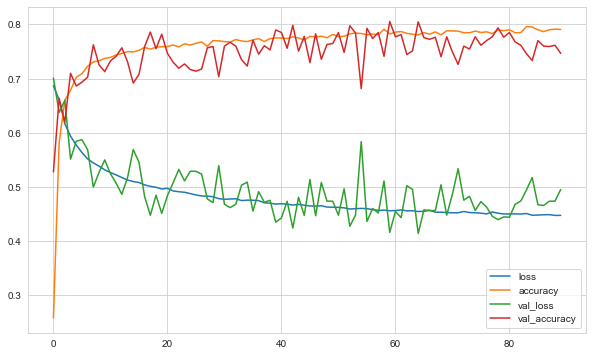

In [62]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [63]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.44060468673706055
accuracy :  0.7879999876022339


In [64]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 3ms/step
[[1007  187]
 [ 131  175]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1194
           1       0.48      0.57      0.52       306

    accuracy                           0.79      1500
   macro avg       0.68      0.71      0.69      1500
weighted avg       0.80      0.79      0.79      1500



#### Monitor the "val_recall" as metric

In [65]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = [tf.keras.metrics.Recall()])

In [66]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 25, restore_best_weights = True)

In [67]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop], class_weight=class_weight)

Epoch 1/1000
226/226 [==============================] - 3s 6ms/step - loss: 0.6823 - recall: 0.2524 - val_loss: 0.6133 - val_recall: 0.5204
Epoch 2/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.6656 - recall: 0.5848 - val_loss: 0.6082 - val_recall: 0.6171
Epoch 3/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.6536 - recall: 0.6402 - val_loss: 0.6244 - val_recall: 0.6840
Epoch 4/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.6408 - recall: 0.6601 - val_loss: 0.5568 - val_recall: 0.5167
Epoch 5/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.6259 - recall: 0.6334 - val_loss: 0.5640 - val_recall: 0.6580
Epoch 6/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.6071 - recall: 0.6785 - val_loss: 0.5757 - val_recall: 0.7398
Epoch 7/1000
226/226 [==============================] - 1s 4ms/step - loss: 0.5868 - recall: 0.6902 - val_loss: 0.5637 - val_recall: 0.7881
Epoch 8/1000
226/226

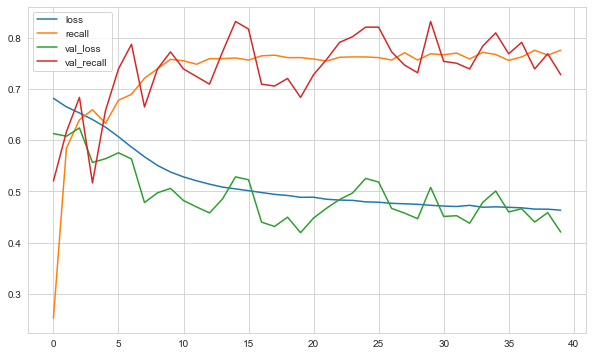

In [68]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [69]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.5508055686950684
recall :  0.7679738402366638


In [70]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 2ms/step
[[805 389]
 [ 71 235]]
              precision    recall  f1-score   support

           0       0.92      0.67      0.78      1194
           1       0.38      0.77      0.51       306

    accuracy                           0.69      1500
   macro avg       0.65      0.72      0.64      1500
weighted avg       0.81      0.69      0.72      1500



## GridSearchCV

In [17]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 16, activation = 'relu'))
    classifier.add(Dense(units = 8, activation = 'relu'))
    classifier.add(Dense(units = 4, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ["accuracy"])
    return classifier

In [18]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [21]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.15, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Epoch 1/200
226/226 [==============================] - 1s 3ms/step - loss: 0.4731 - accuracy: 0.7949 - val_loss: 0.4496 - val_accuracy: 0.7890
Epoch 2/200
226/226 [==============================] - 1s 2ms/step - loss: 0.4397 - accuracy: 0.7976 - val_loss: 0.4422 - val_accuracy: 0.7890
Epoch 3/200
226/226 [==============================] - 1s 2ms/step - loss: 0.4211 - accuracy: 0.8134 - val_loss: 0.4246 - val_accuracy: 0.8039
Epoch 4/200
226/226 [==============================] - 1s 2ms/step - loss: 0.4080 - accuracy: 0.8255 - val_loss: 0.4066 - val_accuracy: 0.8227
Epoch 5/200
226/226 [==============================] - 1s 2ms/step - loss: 0.3925 - accuracy: 0.8336 - val_loss: 0.4097 - val_accuracy: 0.8110
Epoch 6/200
226/226 [==============================] - 1s 2ms/step - loss: 0.3808 - accuracy: 0.8400 - val_loss: 0.3912 - val_accuracy: 0.8337
Epoch 7/200
226/226 [==============================] - 0s 2ms/step - loss: 0.37

226/226 [==============================] - 1s 3ms/step - loss: 0.3180 - accuracy: 0.8731 - val_loss: 0.3498 - val_accuracy: 0.8588
Epoch 58/200
226/226 [==============================] - 1s 4ms/step - loss: 0.3194 - accuracy: 0.8743 - val_loss: 0.3435 - val_accuracy: 0.8612
Epoch 59/200
226/226 [==============================] - 1s 4ms/step - loss: 0.3198 - accuracy: 0.8688 - val_loss: 0.3638 - val_accuracy: 0.8392
Epoch 60/200
226/226 [==============================] - 1s 4ms/step - loss: 0.3202 - accuracy: 0.8725 - val_loss: 0.3490 - val_accuracy: 0.8596
Epoch 61/200
226/226 [==============================] - 1s 4ms/step - loss: 0.3183 - accuracy: 0.8746 - val_loss: 0.3405 - val_accuracy: 0.8604
Epoch 62/200
226/226 [==============================] - 1s 3ms/step - loss: 0.3195 - accuracy: 0.8699 - val_loss: 0.3408 - val_accuracy: 0.8651
Epoch 63/200
226/226 [==============================] - 1s 4ms/step - loss: 0.3183 - accuracy: 0.8717 - val_loss: 0.3398 - val_accuracy: 0.8612
Epoch

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001A9EF411B10>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_experimental.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_experimental.rmsprop.RMSprop'>]},
             scoring='accuracy', verbose=1)

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [22]:
grid_model.best_score_

0.8620000000000001

In [23]:
grid_model.best_params_

{'batch_size': 32,
 'learn_rate': 0.005,
 'optimizer': keras.optimizers.optimizer_experimental.adam.Adam}

In [24]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
4,0.862,0.016,1,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
5,0.862,0.018,2,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
6,0.861,0.016,3,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
11,0.860,0.015,4,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
9,0.860,0.017,5,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
8,0.860,0.016,6,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
7,0.857,0.015,7,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
0,0.857,0.016,8,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
1,0.855,0.020,9,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
3,0.855,0.025,10,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."


In [25]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 2ms/step
[[1152   42]
 [ 194  112]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1194
           1       0.73      0.37      0.49       306

    accuracy                           0.84      1500
   macro avg       0.79      0.67      0.70      1500
weighted avg       0.83      0.84      0.82      1500



47/47 [==============================] - 0s 2ms/step


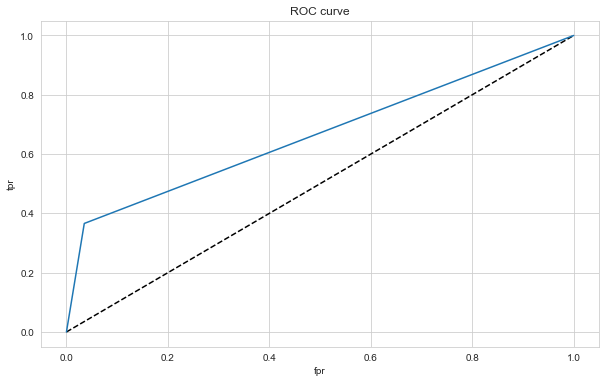

In [27]:
y_pred_proba = grid_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [28]:
roc_auc_score(y_test, y_pred_proba)

0.66541859624922

# Final Model and Model Deployment

In [29]:
import pickle
pickle.dump(scaler, open("scaler_bank", 'wb'))

In [30]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [31]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [32]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
266/266 [==============================] - 2s 4ms/step - loss: 0.5137 - accuracy: 0.7964 - val_loss: 0.4897 - val_accuracy: 0.7960
Epoch 2/1000
266/266 [==============================] - 1s 4ms/step - loss: 0.4797 - accuracy: 0.7964 - val_loss: 0.4697 - val_accuracy: 0.7960
Epoch 3/1000
266/266 [==============================] - 1s 4ms/step - loss: 0.4487 - accuracy: 0.7964 - val_loss: 0.4503 - val_accuracy: 0.7960
Epoch 4/1000
266/266 [==============================] - 1s 3ms/step - loss: 0.4290 - accuracy: 0.7964 - val_loss: 0.4415 - val_accuracy: 0.7960
Epoch 5/1000
266/266 [==============================] - 1s 4ms/step - loss: 0.4176 - accuracy: 0.8202 - val_loss: 0.4340 - val_accuracy: 0.8227
Epoch 6/1000
266/266 [==============================] - 1s 4ms/step - loss: 0.4056 - accuracy: 0.8313 - val_loss: 0.4251 - val_accuracy: 0.8273
Epoch 7/1000
266/266 [==============================] - 1s 4ms/step - loss: 0.3945 - accuracy: 0.8398 - val_loss: 0.4174 - val_accuracy:

<AxesSubplot:>

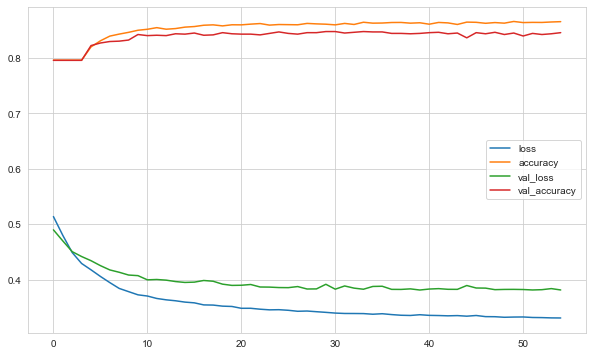

In [33]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [34]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.38105231523513794
accuracy :  0.8446666598320007


In [35]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 1ms/step
[[1150   44]
 [ 189  117]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1194
           1       0.73      0.38      0.50       306

    accuracy                           0.84      1500
   macro avg       0.79      0.67      0.70      1500
weighted avg       0.83      0.84      0.82      1500



In [36]:
model.save("model_bank.h5")

## Prediction

In [37]:
from tensorflow.keras.models import load_model

In [38]:
model_bank = load_model('model_bank.h5')
scaler_bank = pickle.load(open("scaler_bank", "rb"))

In [39]:
single_customer = df.drop('Exited', axis = 1).iloc[0:1, :]
single_customer

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,1,42,2,0.000,1,1,1,101348.880


In [40]:
single_customer = scaler_bank.transform(single_customer)
single_customer

array([[0.538     , 0.        , 1.        , 0.32432432, 0.2       ,
        0.        , 0.        , 1.        , 1.        , 0.50678999]])

In [42]:
(model_bank.predict(single_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 61ms/step


array([[0]])

In [43]:
df["Exited"].iloc[0]

1